# Notes
---
*   Make sure to have the *80_conformations.txt* file on the same directory as this notebook
*   Output images are already saved under folder `/output`
*   Notebook developed in Google Colab
*   Keep in mind that task 3 runs for about 2 - 3 minutes 

# Libraries
---

In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import operator as op
from functools import reduce

*if your are not using Google Colab, ignore/remove the block below or else modify it to match your Google Drive paths*

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir("drive/My Drive/Colab Notebooks/Structural/Exercise1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RMSD

---

*c-RMSD and d-RMSD*


## Task 2.1

*Use c-RMSD to compute the optimal translation and rotation minimizing c-RMSD between the first 2 conformations.*

Reading data from molecule file - Setting up constants

In [7]:
conformations = 0
n = 0  # number of atoms in backbone
triplets = []

counter = 0
with open('./80_conformations.txt', 'r') as f:
    for l in f:
        if (counter == 0):
            conformations = int(l.strip().split("\t")[0])
        elif ( counter == 1):
            n = int(l.strip().split("\t")[0])
        else:
            triplets.append(l.strip().split("\t"))
        counter += 1

# convert string triplets to floats 
for i in range(len(triplets)):
    temp = triplets[i]
    triplets[i] = np.array([float(x) for x in temp])

In [8]:
def cRMSD(x, y):
    '''
    Returns the cRMSD for 2 conformations

    @x ,y: conformations
    @n: atoms in backbone
    '''

    sum = 0
    for i in range(n):
        sum += (np.linalg.norm(x[i] - y[i])) ** 2

    return np.sqrt(sum/n)

In [9]:
def optimal_cRMSD(x, y):
    '''
    Returns U, V, Σ, Q and minimum RMSD between 2 conformations

    @x ,y: conformations
    '''
    X = np.subtract(x, np.mean(x))
    Y = np.subtract(y, np.mean(y))

    SVD = np.linalg.svd(X.T @ Y)
    U, S, Vt = SVD

    Q = U @ Vt
    detQ = np.linalg.det(Q)
    
    for i in range(len(U)):
            U[i][2] = U[i][2] * (-1)

    if detQ < 0:
        Q = U @ Vt

    result = cRMSD(X @ Q, Y)

    return U,Vt.T,S,Q,result

U, V, S, Q, RMSD = optimal_cRMSD(triplets[:n], triplets[n:2*n]) 

print("================== U ==================\n")
print(U)
print("\n================== V ==================\n")
print(V)
print("\n================== Σ =========================\n")
print(S)
print("\n================== Q ==============================\n")
print(Q)
print("\n====== RMSD ======\n")
print(RMSD)

================== U ==================

[[-0.63410153  0.46632078  0.61681454]
 [-0.02695965 -0.8105389   0.58506399]
 [-0.77277968 -0.35436086 -0.5265358 ]]

================== V ==================

[[-0.6340207   0.46706983 -0.6163307 ]
 [-0.03042997 -0.81144844 -0.58363126]
 [-0.77271714 -0.35127937  0.52868803]]

================== Σ =========================

[34917.91855599 10937.35470003  5755.85773675]

================== Q ==============================

[[ 9.99999599e-01  8.92669266e-04  6.97845821e-05]
 [-8.92400674e-04  9.99992538e-01 -3.75854882e-03]
 [-7.31392024e-05  3.75848503e-03  9.99992934e-01]]

====== RMSD ======

0.6282608129540027


## Task 2.2

*Compute the c-RMSD distances between all $\left(\begin{array}{c}80 \\ 2\end{array}\right)$ pairs of conformations. Compute the mean and median.*

In [10]:
distances = []
for i in range(conformations):
    for j in range(conformations):
        if j > i:
            _,_,_,_,temp = optimal_cRMSD(triplets[i*n:i*n + n], triplets[j*n:j*n+n])
            distances.append(temp)

### Visualization

Mean :  10.004957817941573
Median:  9.918130453574387




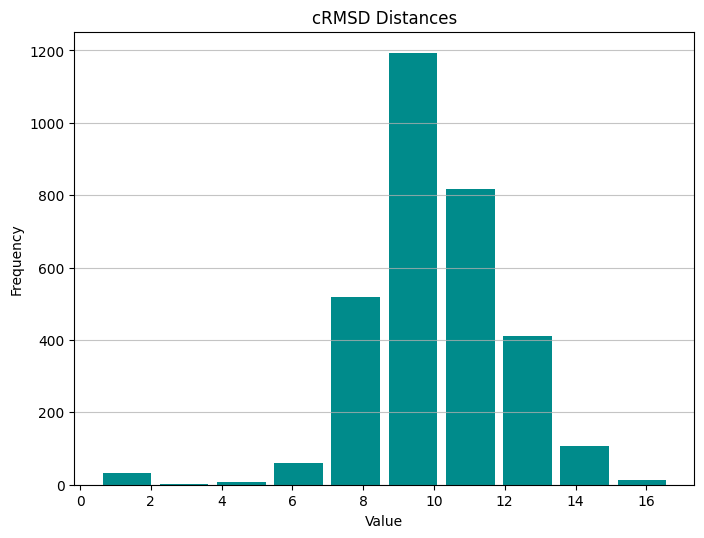

In [11]:
print('Mean : ',np.mean(distances))
print('Median: ',np.median(distances))
print("\n")

plt.figure(figsize=(8, 6), dpi=100)
plt.grid(axis='y', alpha=0.75)
plt.hist(distances,bins=10,range=(np.min(distances),np.max(distances)), rwidth=0.85, color='darkcyan')
plt.title("cRMSD Distances")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Task 2.3

*Repeat (2) for d-RMSD using all $k=\left(\begin{array}{l}n \\ 2\end{array}\right)$ distances within each conformation*

### Helper functions

In [12]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def distanceVector(x):
    '''
    Returns a distance vector between all atoms of a conformation

    @x: conformation
    '''
    dist = []
    for i in range(n):
        for j in range(n):
            if j > i:
                dist.append(np.linalg.norm(x[i] - x[j]))

    return dist

### d-RMSD computation

In [13]:
def dRMSD(x, y):
    '''
    Returns the dRMSD for 2 conformations

    @x ,y: conformations
    @n: atoms in backbone
    '''

    k = ncr(n,2)
    sum = 0
    for i in range(k):
        sum += ((x[i] - y[i]) ** 2)

    return np.sqrt(sum/k)

In [14]:
confDistances = []
for i in range(conformations):
    confDistances.append(distanceVector(triplets[i*n:i*n + n]))

distances2 = []
for i in range(conformations):
    for j in range(conformations):
        if j > i:
            temp2 = dRMSD(
                confDistances[i], confDistances[j]
            )
            distances2.append(temp2)

### Visualization

Mean :  6.7950321975044385
Median:  6.468606946347217




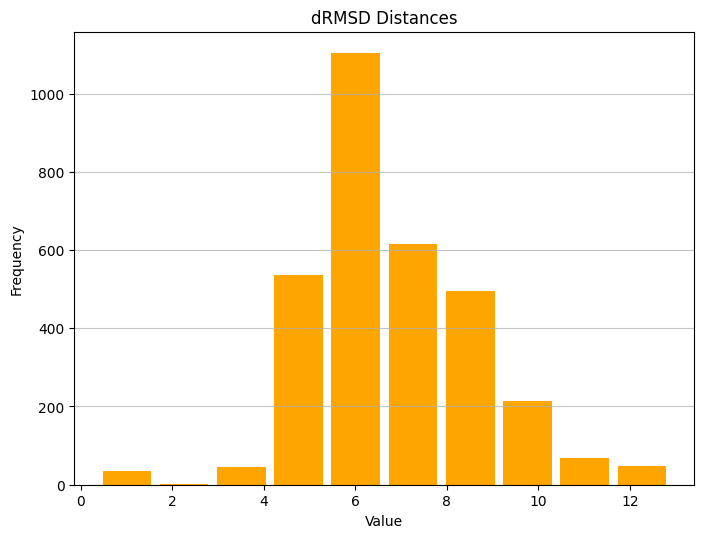

In [15]:
print('Mean : ',np.mean(distances2))
print('Median: ',np.median(distances2))
print("\n")

plt.figure(figsize=(8, 6), dpi=100)
plt.grid(axis='y', alpha=0.75)
plt.hist(distances2,bins=10,range=(np.min(distances2),np.max(distances2)), rwidth=0.85, color='orange')
plt.title("dRMSD Distances")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()